In [3]:
#Import Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read Data
DataBase = pd.read_csv('Startups.csv')
DataBase.shape

(1186, 7)

In [5]:
#Criando uma Sequence
Sequence = []

for valor in range(1, DataBase['Company'].count()+1):
    Sequence.append(valor) 

In [6]:
#Ajustando Campos

DataBase['Valuation ($B)'] = pd.to_numeric(DataBase['Valuation ($B)'].apply(lambda linha: linha.replace('$', '')))

DataBase['Date Joined'] = pd.to_datetime(DataBase['Date Joined'])

DataBase['ID'] = Sequence

In [7]:
#Rename Columns
DataBase.rename(columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa', 
    'Valuation ($B)' : 'Valor ($)', 
    'Date Joined' : 'Data de Adesão', 
    'Country' : 'Pais', 
    'City ' : 'Cidade',
    'Industry' : 'Setor', 
    'Investors' : 'Investidores',
}, inplace=True)

In [8]:
#Check type of information
DataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Empresa         1186 non-null   object        
 1   Valor ($)       1186 non-null   float64       
 2   Data de Adesão  1186 non-null   datetime64[ns]
 3   Pais            1186 non-null   object        
 4   City            1186 non-null   object        
 5   Setor           1186 non-null   object        
 6   Investidores    1168 non-null   object        
 7   ID              1186 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 74.3+ KB


In [9]:
DataBase.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investidores,ID
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",1
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",3
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",4
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",5


<Axes: title={'center': 'Analisando Campos Nulos'}>

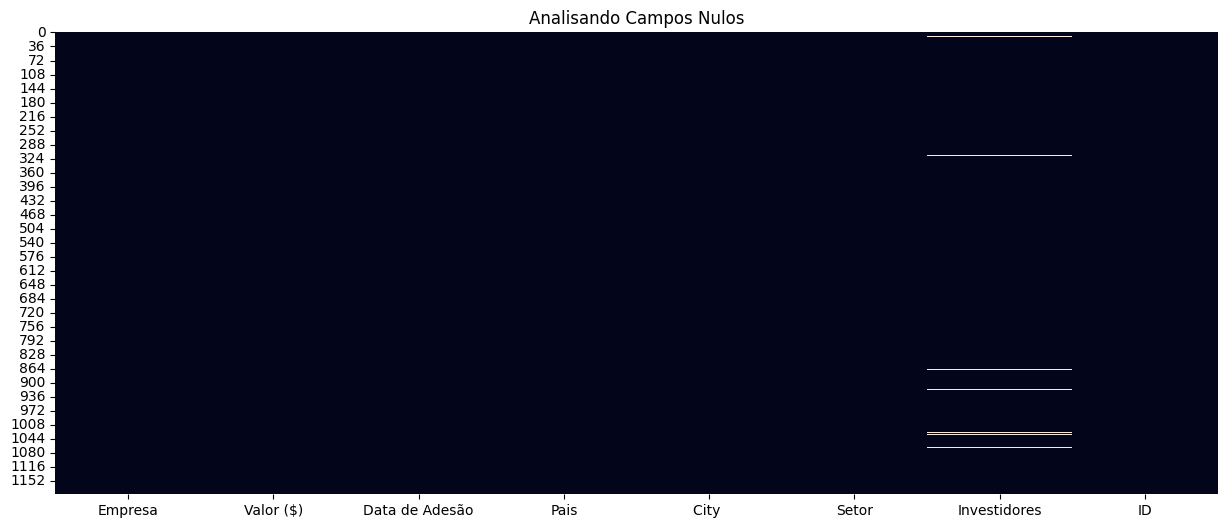

In [10]:
plt.figure(figsize=(15,6))
plt.title('Analisando Campos Nulos')
sns.heatmap(DataBase.isnull(), cbar=False)

In [11]:
#Quatidade de valores unicos por campos.
DataBase.nunique()

Empresa           1183
Valor ($)          222
Data de Adesão     695
Pais                48
City               286
Setor               34
Investidores      1152
ID                1186
dtype: int64

In [12]:
#Valores unicos em um determinado campo.
DataBase['Pais'].unique()

array(['China', 'United States', 'Australia', 'United Kingdom', 'Bahamas',
       'India', 'Indonesia', 'Germany', 'Turkey', 'Hong Kong',
       'Seychelles', 'Sweden', 'Mexico', 'Estonia', 'Canada',
       'Netherlands', 'France', 'Israel', 'Finland', 'Colombia',
       'Belgium', 'Brazil', 'South Korea', 'Denmark', 'Switzerland',
       'Lithuania', 'Austria', 'Ireland', 'Singapore', 'Vietnam',
       'United Arab Emirates', 'Argentina', 'Spain', 'Japan',
       'Luxembourg', 'Nigeria', 'Philippines', 'Croatia', 'Senegal',
       'Malaysia', 'Bermuda', 'Norway', 'South Africa', 'Ecuador',
       'Chile', 'Thailand', 'Czech Republic', 'Italy'], dtype=object)

In [13]:
DataBase['Pais'].unique()[0:5]

array(['China', 'United States', 'Australia', 'United Kingdom', 'Bahamas'],
      dtype=object)

([<matplotlib.axis.XTick at 0x27273ebc530>,
 [Text(0.0, 0, 'Fintech'),
  Text(1.0, 0, 'Internet software & services'),
  Text(2.0, 0, 'E-commerce & direct-to-consumer'),
  Text(3.0, 0, 'Health'),
  Text(4.0, 0, 'Artificial intelligence'),
  Text(5.0, 0, 'Other'),
  Text(6.0, 0, 'Supply chain, logistics, & delivery'),
  Text(7.0, 0, 'Cybersecurity'),
  Text(8.0, 0, 'Data management & analytics'),
  Text(9.0, 0, 'Auto & transportation'),
  Text(10.0, 0, 'Hardware'),
  Text(11.0, 0, 'Mobile & telecommunications'),
  Text(12.0, 0, 'Edtech'),
  Text(13.0, 0, 'Consumer & retail'),
  Text(14.0, 0, 'Travel'),
  Text(15.0, 0, 'Artificial Intelligence'),
  Text(16.0, 0, 'Internet'),
  Text(17.0, 0, 'Sequoia Capital, Thoma Bravo, Softbank'),
  Text(18.0, 0, 'Tiger Global Management, Tiger Brokers, DCM Ventures'),
  Text(19.0, 0, 'Kuang-Chi'),
  Text(20.0, 0, 'GIC. Apis Partners, Insight Partners'),
  Text(21.0, 0, 'Jungle Ventures, Accel, Venture Highway'),
  Text(22.0, 0, 'Vision Plus Capital, G

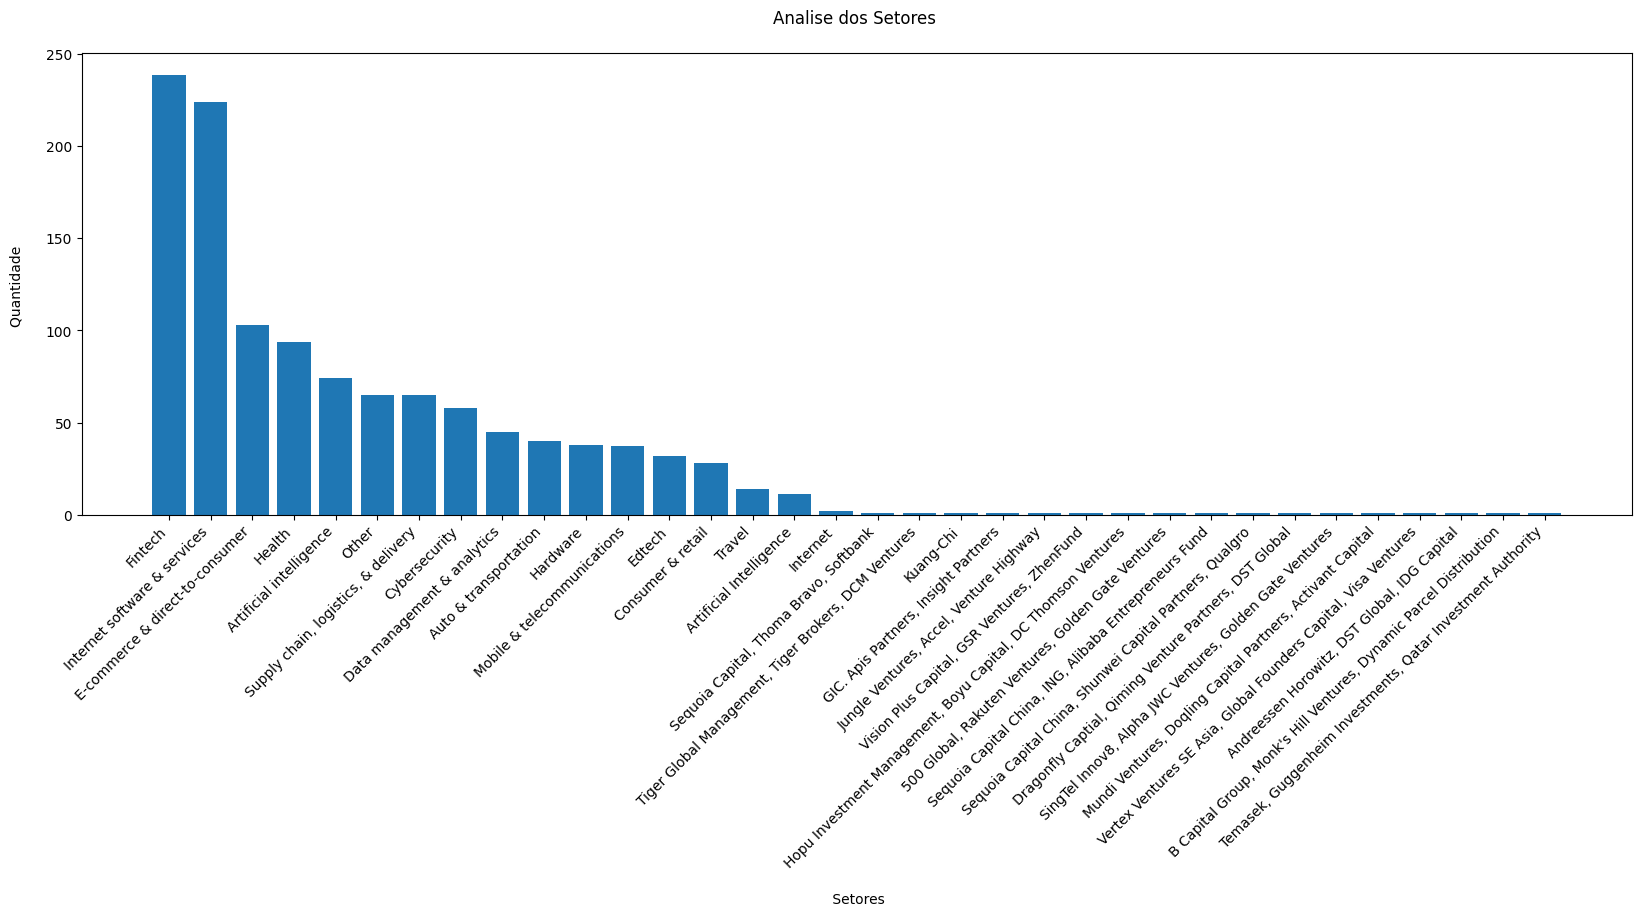

In [14]:
#Quantidade de registros com os valores unicos por campo.

xValue = DataBase['Setor'].value_counts()
yValue = DataBase['Setor'].value_counts().index


#Editando o Graficp
plt.figure(figsize=(20,6))
plt.title('Analise dos Setores \n')
plt.xlabel('\n Setores')
plt.ylabel('Quantidade \n')

#Inserindo valores no gráfico
plt.bar(yValue,xValue)

plt.xticks(yValue, rotation=45, ha='right') 

([<matplotlib.patches.Wedge at 0x27273f45a60>,
 [Text(-1.0423241022913652, -0.3515116865518126, 'United States'),
  Text(1.0124694736134034, -0.43000647088270416, 'China'),
  Text(1.0421997207207954, 0.35188029517081, 'India'),
  Text(0.8612602059630474, 0.6842739638657087, 'United Kingdom'),
  Text(0.6879215920741343, 0.858349511072377, 'Germany'),
  Text(0.5442638757119806, 0.9559167503475258, 'France'),
  Text(0.4087959184406662, 1.0212178499547746, 'Israel'),
  Text(0.28150635683598413, 1.0633692543330993, 'Canada'),
  Text(0.16619821661532375, 1.0873721316981992, 'Brazil'),
  Text(0.05558774315014177, 1.0985945579746306, 'South Korea')],
 [Text(-0.5685404194316537, -0.19173364721007957, '60.4%'),
  Text(0.5522560765164019, -0.23454898411783862, '16.5%'),
  Text(0.5684725749386156, 0.1919347064568054, '6.6%'),
  Text(0.46977829416166217, 0.3732403439267502, '4.4%'),
  Text(0.3752299593131641, 0.4681906424031147, '2.8%'),
  Text(0.2968712049338076, 0.5214091365531958, '2.3%'),
  Tex

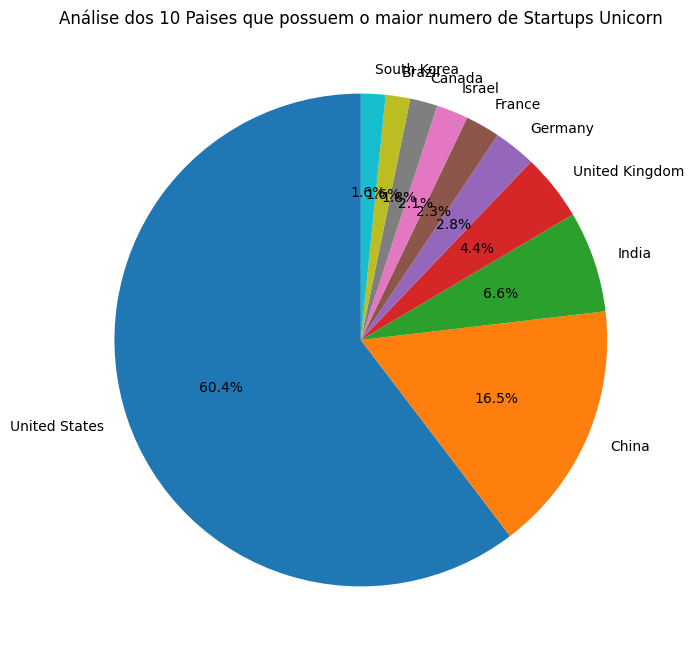

In [15]:
#Dados
AnalisePaises = round(DataBase['Pais'].value_counts(normalize=True)*100,2)[0:10]

#Ajustando o tamanho da figura
plt.figure( figsize=(18,8))

#Inserindo um titulo para o gráfico
plt.title('Análise dos 10 Paises que possuem o maior numero de Startups Unicorn')

#Inserindo valores no gráfico
plt.pie(
    AnalisePaises,
    labels=AnalisePaises.index,
    startangle=90,
    autopct='%1.1f%%'
)

In [16]:
#Extraindo Ano/Mes 

DataBase['Ano'] = DataBase['Data de Adesão'].dt.year
DataBase['Mes'] = DataBase['Data de Adesão'].dt.month

DataBase.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investidores,ID,Ano,Mes
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",1,2017,4
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2,2012,12
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",3,2018,7
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",4,2014,1
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",5,2018,1


In [17]:
AnaliseAgrupada = DataBase.groupby(by=['Pais', 'Ano', 'Mes', 'Empresa']).count()['ID'].reset_index()

AnaliseAgrupada

,Pais,Ano,Mes,Empresa,ID
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
1181,United States,2022,8,Flow,1
1182,United States,2022,8,Incredible Health,1
1183,United States,2022,8,Orna Therapeutics,1
1184,Vietnam,2021,10,Sky Mavis,1


In [18]:
AnaliseAgrupada.loc[
    AnaliseAgrupada['Pais'] == 'Brazil'
]

,Pais,Ano,Mes,Empresa,ID
16,Brazil,2018,7,Movile,1
17,Brazil,2018,11,iFood,1
18,Brazil,2019,6,Loggi,1
19,Brazil,2019,9,QuintoAndar,1
20,Brazil,2019,10,EBANX,1
21,Brazil,2019,12,Wildlife Studios,1
22,Brazil,2020,1,Loft,1
23,Brazil,2020,12,C6 Bank,1
24,Brazil,2020,12,Creditas,1
25,Brazil,2021,1,MadeiraMadeira,1


([<matplotlib.axis.XTick at 0x2727a78ae40>,
 [Text(0.0, 0, 'United States'),
  Text(1.0, 0, 'China'),
  Text(2.0, 0, 'United Kingdom'),
  Text(3.0, 0, 'India'),
  Text(4.0, 0, 'Germany'),
  Text(5.0, 0, 'France'),
  Text(6.0, 0, 'Australia'),
  Text(7.0, 0, 'Canada'),
  Text(8.0, 0, 'Israel'),
  Text(9.0, 0, 'Brazil'),
  Text(10.0, 0, 'South Korea'),
  Text(11.0, 0, 'Bahamas'),
  Text(12.0, 0, 'Indonesia'),
  Text(13.0, 0, 'Sweden'),
  Text(14.0, 0, 'Netherlands'),
  Text(15.0, 0, 'Singapore'),
  Text(16.0, 0, 'Hong Kong'),
  Text(17.0, 0, 'Mexico'),
  Text(18.0, 0, 'Turkey'),
  Text(19.0, 0, 'Finland'),
  Text(20.0, 0, 'Switzerland'),
  Text(21.0, 0, 'Ireland'),
  Text(22.0, 0, 'Seychelles'),
  Text(23.0, 0, 'Estonia'),
  Text(24.0, 0, 'Belgium'),
  Text(25.0, 0, 'Japan'),
  Text(26.0, 0, 'Austria'),
  Text(27.0, 0, 'Colombia'),
  Text(28.0, 0, 'Denmark'),
  Text(29.0, 0, 'Spain'),
  Text(30.0, 0, 'Lithuania'),
  Text(31.0, 0, 'Norway'),
  Text(32.0, 0, 'Vietnam'),
  Text(33.0, 0, 'Un

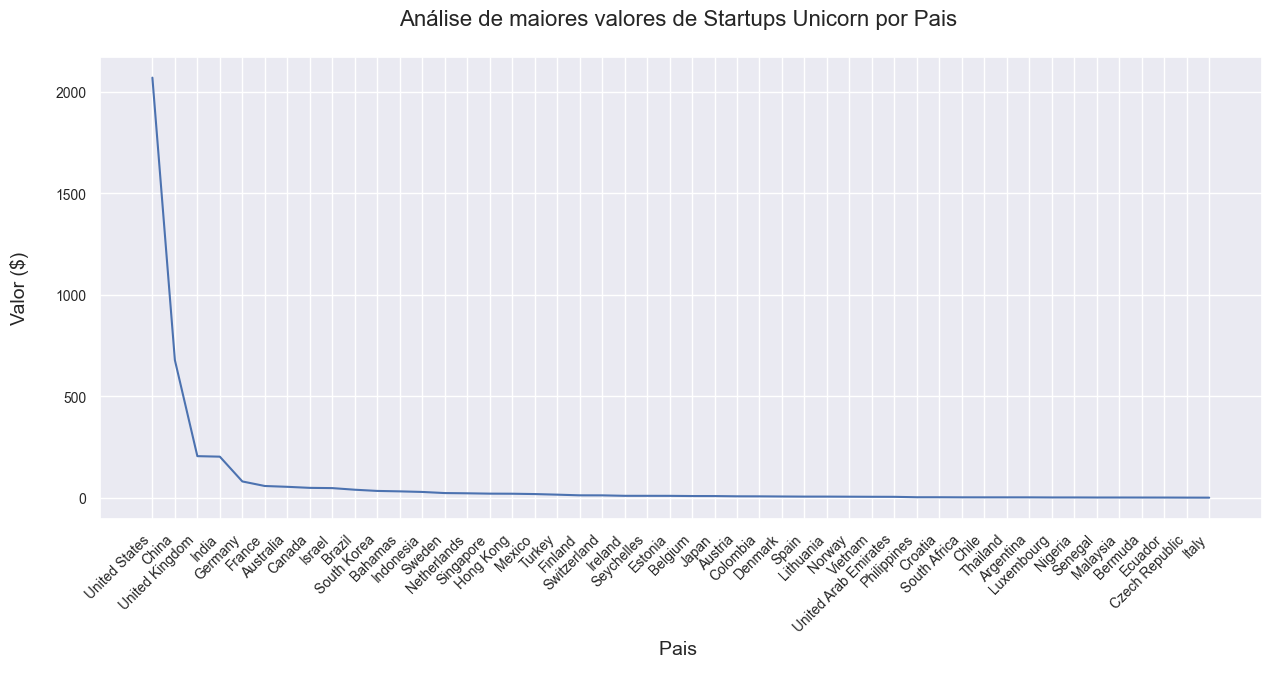

In [35]:
#Dados
AnaliseValorPais = DataBase.groupby( by=['Pais'] ).sum(numeric_only=True)['Valor ($)'].reset_index()

GraficoValorPais = AnaliseValorPais.sort_values('Valor ($)', ascending=False)

#Ajustando o estilo de tema do gráfico
sns.set_theme(style='darkgrid')

#Ajustando o gráfico
plt.figure(figsize=(15,6))
plt.title('Análise de maiores valores de Startups Unicorn por Pais \n', fontsize=16)
plt.ylabel('Valor ($)\n', fontsize=14)
plt.xlabel('Pais \n', fontsize=14)

plt.tick_params(axis='both', labelsize=10)

#Inserindo dados no gráfico
plt.plot(GraficoValorPais['Pais'], GraficoValorPais['Valor ($)'])

plt.xticks(GraficoValorPais['Pais'], rotation=45, ha='right') 